# 3. Linear Models for Regression

## 3.1. Basis Function

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
class Poly_Feature(object): 
  def __init__(self, degree = 9):
    self.M = degree

  def transform(self, X:np.ndarray): 
    if X.ndim == 1:
      X = X[:, None] 
    pows = np.repeat(np.arange(1, self.M + 1), X.shape[1]) 
    PHI = np.tile(X, self.M) ** pows 
    ones_mat = np.ones(X.shape[0]).reshape(-1,1) 
    return np.concatenate([ones_mat, PHI], axis = 1)

In [ ]:
class Gaussian_Feature():
  def __init__(self, mean:np.array, variance:float):
    self.mean = mean
    self.var = variance

  def gauss_function(self,x,m):
    return np.exp(-0.5*np.square(x-m)/self.var)

  def transform(self, train_x:np.ndarray):
    if train_x.ndim == 1:
       train_x = train_x[:, None]
    X = np.ones((train_x.shape[0],1)) 
    for m in self.mean:
      X = np.append(X, self.gauss_function(train_x, m), axis = 1) 
    return X

In [ ]:
class Sigmoid_Feature():
  def __init__(self, mean:np.array, std:float = 1):
    self.mean = mean
    self.std = std

  def sigmoind_function(self, x, mean):
    a = (x - mean) / self.std
    return 0.5 + 0.5 * np.tanh(0.5 * a)

  def transform(self, train_x:np.ndarray):
    if train_x.ndim ==1:
      train_x = train_x.reshape(len(train_x), 1)

    X = np.ones((train_x.shape[0],1)) 
    for m in self.mean:
      X = np.append(X, self.sigmoind_function(train_x, m), axis = 1)
    return X

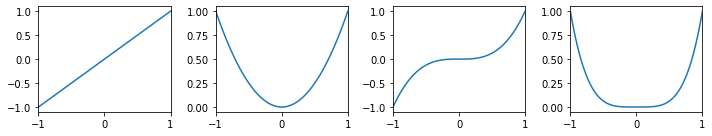

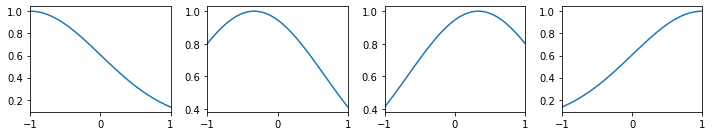

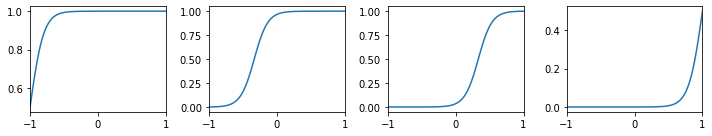

In [ ]:
deg = 4

x = np.linspace(-1,1,100)

polynomial_basis = Poly_Feature(deg).transform(x)
gaussian_basis = Gaussian_Feature(np.linspace(-1,1,deg),1).transform(x)
sigmoid_basis = Sigmoid_Feature(np.linspace(-1,1,deg),0.1).transform(x)

for i,basis in enumerate([polynomial_basis,gaussian_basis,sigmoid_basis],1): 
    fig = plt.figure(figsize=(10, 2))
    for col in range(1, deg+1):
        fig.add_subplot(1,deg,col) 
        plt.plot(x,basis[:,col])
        plt.xlim([-1,1])
        plt.xticks([-1,0,1])
        
        
    plt.tight_layout() 
    plt.show()

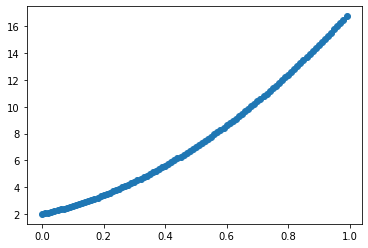

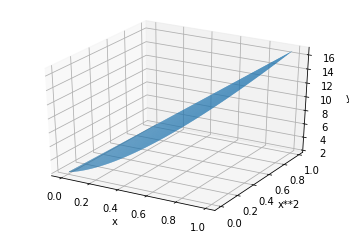

In [ ]:
def func(x, beta0, beta1, beta2):
  y = beta0 + beta1 * x + beta2 * x**2
  return y

x = np.arange(0,1,0.01)

y = func(x, 2,5,10)
plt.scatter(x, y)
plt.show()

ax = plt.axes(projection='3d')
ax.set_xlabel("x")
ax.set_ylabel("x**2")
ax.set_zlabel("y")

ax.plot_trisurf(x ,x**2, y)
plt.show()

In [ ]:
x.shape

(100,)

##3.2 Linear Basis Regression Model

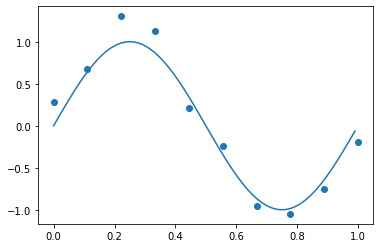

In [ ]:
def func(x):
  return np.sin(2 * np.pi * x)

def generate_sample(n, func, std):
  x = np.linspace(0,1,n) 
  y = func(x)+np.random.normal(0,std,n)
  return x, y

x_true = np.arange(0,1,0.01) 
y_true= func(x_true)
plt.plot(x_true,y_true)

x_train, y_train = generate_sample(10, func, 0.2)
plt.scatter(x_train,y_train)
plt.show()

In [ ]:
class Multiple_Regression():
  def __init__(self):
    self.beta = None 

  def fit(self, X:np.ndarray, y:np.ndarray):
    dot = X.T @ X 
    self.beta = np.linalg.inv(dot) @ X.T @ y 
    return self.beta
  
  def predict(self, X:np.ndarray):
    return X @ self.beta


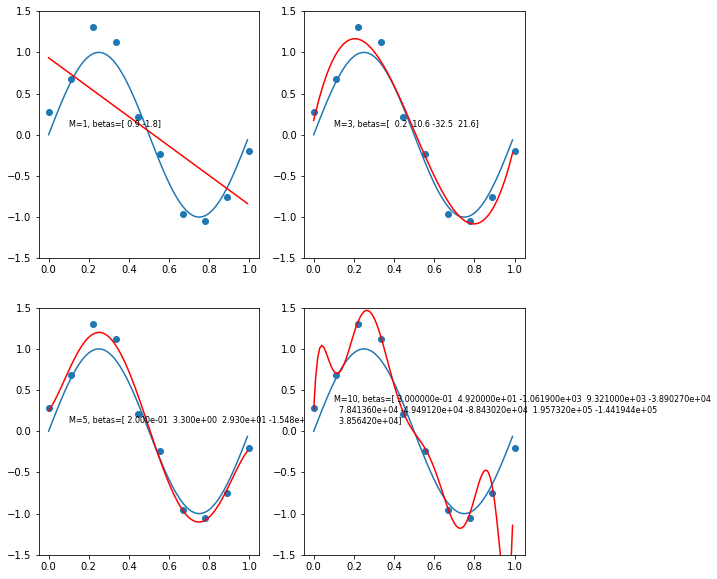

In [ ]:
Model = Multiple_Regression()
plt.figure(figsize=(10, 10))
for i, deg in enumerate([1,3,5,10],1): 
  plt.subplot(2,2,i) 
  feature = Poly_Feature(deg)
  X_train = feature.transform(x_train)
  X_true = feature.transform(x_true)
  betas = Model.fit(X_train, y_train)
  plt.plot(x_true,y_true)
  plt.plot(x_true, Model.predict(X_true), color= "red")
  plt.scatter(x_train, y_train)
  plt.text(0.1, 0.1, "M={}, betas={}".format(deg,np.round(betas,1)), fontsize=8)
  plt.xlim(-0.05,1.05)
  plt.ylim(-1.5,1.5)
plt.subplots_adjust(right=0.8) 
plt.show()


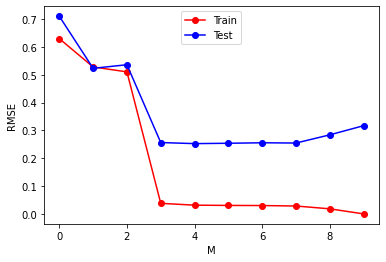

In [ ]:
def rmse(a,b):
  return np.sqrt(np.mean(np.square(a-b)))

x_true = np.arange(0,1,0.01) 
y_true= func(x_true)

x_train, y_train = generate_sample(10, func, 0.2)
x_test, y_test = generate_sample(100,func, 0.2)

RMSE_train = []
RMSE_test = []
M_list = range(0,10)
for i,deg in enumerate(M_list,1):
  model = Multiple_Regression()
  Poly = Poly_Feature(deg)
  X_train = Poly.transform(x_train)
  model.fit(X_train,y_train)
  X_test = Poly.transform(x_test)
  
  y_trpr = model.predict(X_train)
  y_pred = model.predict(X_test)
  
  RMSE_train.append(rmse(y_train, y_trpr))
  RMSE_test.append(rmse(y_test,y_pred))

plt.plot(M_list,RMSE_train, color = "red", label = "Train", marker = 'o')
plt.plot(M_list,RMSE_test, color = "blue", label = "Test", marker = 'o')
plt.xlabel("M")
plt.ylabel('RMSE')
plt.legend(loc='upper center', fontsize = 10)
plt.show()



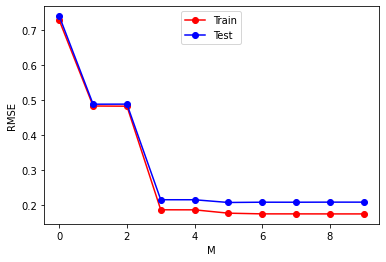

In [ ]:
def rmse(a,b):
  return np.sqrt(np.mean(np.square(a-b)))

x_true = np.arange(0,1,0.01) 
y_true= func(x_true)

x_train, y_train = generate_sample(100, func, 0.2)
x_test, y_test = generate_sample(1000,func, 0.2)

RMSE_train = []
RMSE_test = []
M_list = range(0,10)
for i,deg in enumerate(M_list,1):
  model = Multiple_Regression()
  Poly = Poly_Feature(deg)
  X_train = Poly.transform(x_train)
  model.fit(X_train,y_train)
  X_test = Poly.transform(x_test)
  
  y_trpr = model.predict(X_train)
  y_pred = model.predict(X_test)
  
  RMSE_train.append(rmse(y_train, y_trpr))
  RMSE_test.append(rmse(y_test,y_pred))

plt.plot(M_list,RMSE_train, color = "red", label = "Train", marker = 'o')
plt.plot(M_list,RMSE_test, color = "blue", label = "Test", marker = 'o')
plt.xlabel("M")
plt.ylabel('RMSE')
plt.legend(loc='upper center', fontsize = 10)
plt.show()



## 3.2. Bias-Variance Decomposition

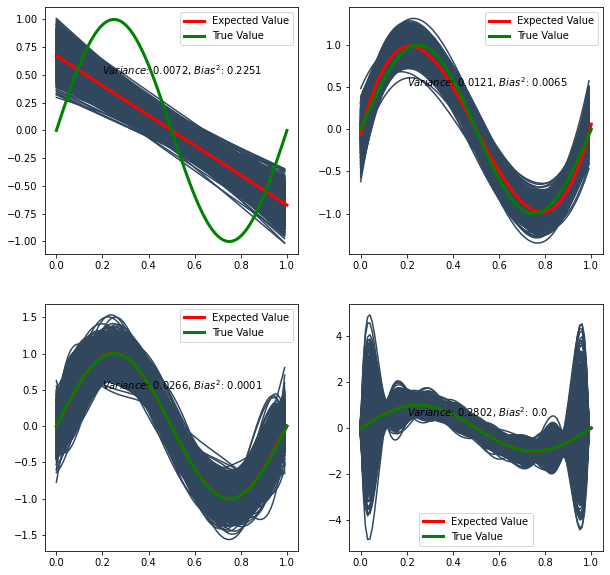

In [ ]:
sim = 1000
M = [1,3,6,9]
x_test, y_test = generate_sample(100,func, 0.2)
y_true= func(x_test)
plt.figure(figsize = (10,10))
Reg = Multiple_Regression()
for i in range(len(M)):
  plt.subplot(2,2,i+1)
  p = M[i]
  predictions = []

  for j in range(sim):
    x_train, y_train = generate_sample(10, func, 0.2)
    Poly = Poly_Feature(p)
    X_train = Poly.transform(x_train)
    X_test = Poly.transform(x_test)
    betas = Reg.fit(X_train, y_train)
    y_pred = Reg.predict(X_test)
    predictions.append(y_pred)
    plt.plot(x_true, y_pred, color = "#30475e")
  
  m = np.mean(np.array(predictions),axis=0)
  plt.plot(x_test,m, color = "red", linewidth = 3, label = "Expected Value")
  plt.plot(x_test, y_true, color = "green", linewidth = 3, label = "True Value")
  var = np.round(np.mean(np.square(predictions-m)),4)
  bias = np.round(np.mean(np.square(m-y_true)),4)
  plt.legend()
  plt.text(0.2,0.5,r"$Variance$: {}, $Bias^2$: {}".format(var, bias))
  


## 3.1.4 Paramter Shrinkage

In [ ]:
class Ridge_Regression():
  def __init__(self, l2):
    self.l2 = l2
    self.beta = None

  def fit(self, X:np.ndarray, y:np.ndarray):
    dot = X.T @ X
    beta_lse = np.linalg.inv(dot) @ X.T @ y
    beta0 = beta_lse[0]

    X = np.delete(X, 0, axis = 1)
    dot = self.l2 * np.identity(X.shape[1]) + X.T @ X
    beta = np.linalg.inv(dot) @ X.T @ y

    self.beta = np.append(beta0, beta)

    return self.beta

  def predict(self, X:np.ndarray):
    return X @ self.beta

Ridge Regression:  [-0.1098  0.9049 -1.2456 -1.0198 -0.4954 -0.0738  0.2026  0.3628  0.4416
  0.4667  0.4577]
Multinomial Regression:  [-1.09800000e-01  1.38076000e+01 -2.68305700e+02  3.19503470e+03
 -1.65993307e+04  3.90421102e+04 -2.84999811e+04 -5.05656951e+04
  1.23008041e+05 -9.64016148e+04  2.70760635e+04]
RMSE of Ridge: 0.57738821878799
RMSE of LSE:  0.46812587194387506


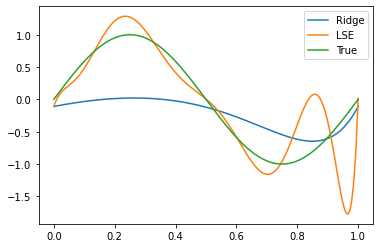

In [ ]:
def rmse(a,b):
  return np.sqrt(np.mean(np.square(a-b)))

def func(x):
  return np.sin(2 * np.pi * x)

def generate_sample(n, func, std):
  x = np.linspace(0,1,n) 
  y = func(x)+np.random.normal(0,std,n)
  return x, y

x_train, y_train = generate_sample(10, func, 0.2)
x_test, y_test = generate_sample(1000, func, 0.2)
y_true = func(x_test)
Poly = Poly_Feature(10)
X_train = Poly.transform(x_train)
X_test = Poly.transform(x_test)

Ridge = Ridge_Regression(0.1)
betas1 = Ridge.fit(X_train, y_train)

Reg = Multiple_Regression()
betas2 = Reg.fit(X_train, y_train)
print("Ridge Regression: ",np.round(betas1,4))
print("Multinomial Regression: ", np.round(betas2, 4))

y_pred1 = Ridge.predict(X_test)
y_pred2 = Reg.predict(X_test)

print("RMSE of Ridge:", rmse(y_pred1, y_test))
print("RMSE of LSE: ",rmse(y_pred2, y_test))

plt.plot(x_test, y_pred1, label = "Ridge")
plt.plot(x_test, y_pred2, label = "LSE")
plt.plot(x_test, y_true, label = "True")
plt.legend()
plt.show()

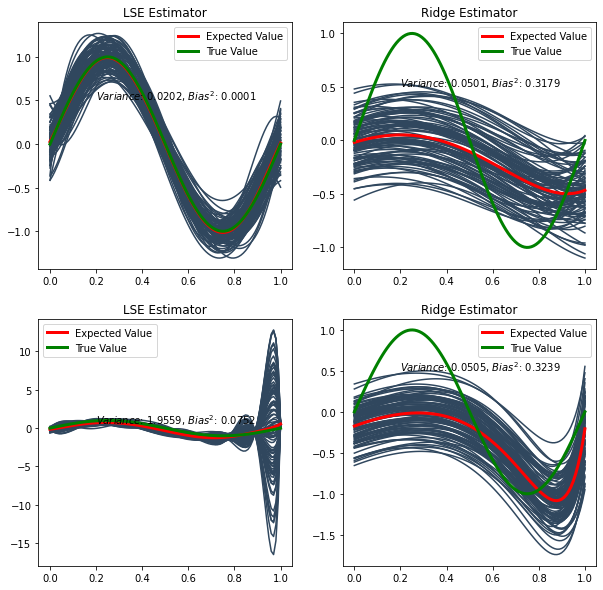

In [ ]:
sim = 100
M = [5,15]
x_test, y_test = generate_sample(100,func, 0.2)
y_true= func(x_test)
plt.figure(figsize = (10,10))


Names = ["LSE","Ridge"]
for i in range(len(M)):
  
  p = M[i]
  
  for j in range(2):

    plt.subplot(2,2,i*2+j+1)
    preds = []

    for k in range(sim):
      x_train, y_train = generate_sample(10, func, 0.2)
      Poly = Poly_Feature(p)
      X_train = Poly.transform(x_train)
      X_test = Poly.transform(x_test)

      Reg = Multiple_Regression()
      Ridge = Ridge_Regression(0.1)

      Models = [Reg, Ridge]
      Models[j].fit(X_train, y_train)
      
      y_pred = Models[j].predict(X_test)
      
      preds.append(y_pred)
      
      plt.plot(x_test, y_pred, color = "#30475e")
   
    m = np.mean(np.array(preds),axis=0)

    plt.title("{} Estimator".format(Names[j]))
    plt.plot(x_test,m, color = "red", linewidth = 3, label = "Expected Value")
    plt.plot(x_test, y_true, color = "green", linewidth = 3, label = "True Value")
    var = np.round(np.mean(np.square(preds-m)),4)
    bias = np.round(np.mean(np.square(m-y_true)),4)
    plt.legend()
    plt.text(0.2,0.5,r"$Variance$: {}, $Bias^2$: {}".format(var, bias))

Step 0 LASSO loss:  485.3932841095011
Step 0 LASSO loss:  380.504503155635
Step 10 LASSO loss:  156.40074248262607
Step 10 LASSO loss:  156.54865899148228
Step 0 Least Square loss:  34.570292511336255
Step 0 Least Square loss:  34.570292511336255
Step 10 Least Square loss:  34.570292511336255
Step 10 Least Square loss:  34.570292511336255


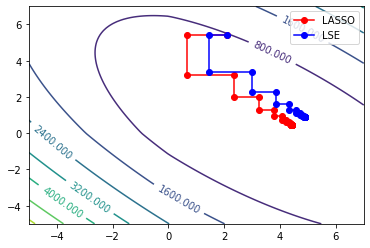

LASSO Estimator:  [4.41383836 0.46248254]
Least Square Estimator closed form:  [4.89827682 0.86900281]
Least Square Estimator approximation:  [4.89823122 0.86903599]
RMSE of LASSO:  0.464898746633362
RMSE of LSE:  0.9364980651722264


In [ ]:
# LASSO Regression

def func(x1, x2, beta0 = 1, beta1 = 4, beta2 = 0):
  y = beta0 + beta1 * x1 + beta2 * x2
  return y

step = 20

x1 = np.random.uniform(0,1,100)
x2 = np.random.uniform(0,1,100)

y = func(x1, x2)

X = np.concatenate([x1[:,None],x2[:,None]],axis=1)

lam = 25

def soft_threshold(Z, lam):
  if -lam <= Z <= lam:
    res = 0
  elif lam < Z:
    res = Z - lam
  elif Z < lam:
    res = Z + lam
  return res

def loss(beta, X, y, lam):
  res = np.sum(np.square(X @ beta - y)) + lam * np.linalg.norm(beta, 1)
  return res

def loss_2d(beta1, beta2, X, y, lam):
  res = 0
  for i in range(X.shape[0]):
    res += np.square(beta1 * X[i,0] + beta2 * X[i,1] + 1  - y[i]) 
  return res + lam * (abs(beta1)+ abs(beta2))

beta1, beta2 = np.meshgrid(np.linspace(-5, 7, 100), np.linspace(-5, 7, 100))
obj = loss_2d(beta1, beta2, X, y, lam)
CS = plt.contour(beta1, beta2, obj)
plt.clabel(CS, inline = 2, fontsize = 10)

dot = X.T @ X
LSE = np.linalg.inv(dot) @ X.T @ y
beta0 = LSE[0]

beta = np.array([2.1, 5.4])
betas = beta.copy()

for s in range(step):
  for j in range(X.shape[1]):
    Z = X[:,j].T @ (y - np.delete(X, j, axis = 1) @ np.delete(beta, j))
    beta[j] = soft_threshold(Z, lam)/(X[:,j].T @ X[:, j])
    betas = np.append(betas, beta)
    if s % 10 == 0:
      print("Step {} LASSO loss: ".format(s), loss(beta, X, y, lam))

beta_LSE = np.array([2.1, 5.4])
betas_LSE = beta_LSE.copy()
lam = 0

for s in range(step):
  for j in range(X.shape[1]):
    Z = X[:,j].T @ (y - np.delete(X, j, axis = 1) @ np.delete(beta_LSE, j))
    beta_LSE[j] = soft_threshold(Z, lam)/(X[:,j].T @ X[:, j])
    betas_LSE = np.append(betas_LSE, beta_LSE)
    if s % 10 == 0:
      print("Step {} Least Square loss: ".format(s), loss(beta, X, y, lam))

betas = betas.reshape(-1,2)
betas_LSE = betas_LSE.reshape(-1,2)

plt.plot(betas[:,0], betas[:,1], marker = "o", color = "red", label = "LASSO")
plt.plot(betas_LSE[:,0], betas_LSE[:,1], marker = "o", color = "blue", label = "LSE")
plt.legend()
plt.show()
print("LASSO Estimator: ", beta)
print("Least Square Estimator closed form: ", np.linalg.inv(X.T @ X) @ X.T @ y)
print("Least Square Estimator approximation: ", beta_LSE)

print("RMSE of LASSO: ", rmse(X @ beta + 1, y))
print("RMSE of LSE: ", rmse(X @ beta_LSE + 1, y))

## 2.3.5 & 3.1.3 Sequntial Algorithm/ On-line Algorithm



In [ ]:
# Gaussian Example

mean = 5
sigma = 2
max = 100

data = np.random.normal(mean,sigma,1)
mu = data.copy()
for i in range(1,max+1):
  add = np.random.normal(mean,sigma,1)
  mu += 1/(i+1)*(add - mu)
  data = np.append(data, add)
  if i % 10 == 0:
    print("{}-th sequential: ".format(i),mu) 

print("MLE: ", np.mean(data))

10-th sequential:  [5.0087368]
20-th sequential:  [5.2381811]
30-th sequential:  [4.87626853]
40-th sequential:  [4.91089149]
50-th sequential:  [4.96184605]
60-th sequential:  [5.11597163]
70-th sequential:  [5.25316934]
80-th sequential:  [5.21630888]
90-th sequential:  [5.16423573]
100-th sequential:  [5.17430935]
MLE:  5.174309348791908


[4.62808889]
[5.0710403]
[5.16221778]
[5.09145282]
[5.17620661]
[5.12202668]
[5.15391007]
[5.10007773]
[5.01755603]
[4.98201561]


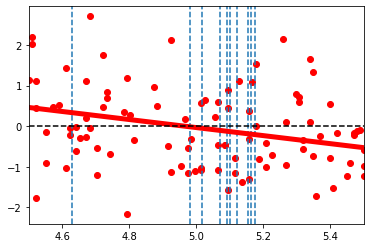

In [ ]:
# Robbins-Monro Algorithm
mean = 5
sigma = 1
max = 100

data = np.random.normal(mean,sigma,1)
mu = data.copy()

z_mean = 0
m_range = np.linspace(4.5,5.5,max)
for i in range(1,max):
  add = np.random.normal(mean,sigma,1)
  
  z = add - m_range
  z_mean += z

  z_mu = add - mu
  mu +=  1/(i+1)*z_mu
  
  num = np.random.uniform(0,max,1)

  plt.scatter(m_range[int(num)], z[int(num)], color = "red")


  if i%10 == 1:   
    plt.axvline(mu, linestyle = "--")
    print(mu)
    
plt.plot(m_range, z_mean/max , color="red", linewidth = 5)
plt.xlim(4.5,5.5)
plt.axhline(0,linestyle="--", color = "black")
plt.show()


